# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [3]:
PATH = "./data/"

In [4]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')
data_test = pd.read_csv(os.path.join(PATH, 'titanic', 'test.csv')).set_index('PassengerId')

In [5]:
data_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [6]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
len(data)

891

In [8]:
data.query("Embarked != ['S', 'C', 'Q']")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [9]:
male_on_board = data.Sex.value_counts()[0]
female_on_board = data.Sex.value_counts()[1]
#np.unique(data.Sex, return_counts=True)

male_on_board_1st_class = len(data.query("Sex == 'male' & Pclass == 1"))
survived_male_1st_class = len(data[(data.Sex == 'male') & (data.Survived == 1) & (data.Pclass ==1)])

male_on_board_2nd_class = len(data.query("Sex == 'male' & Pclass == 2"))
survived_male_2nd_class = len(data[(data.Sex == 'male') & (data.Survived == 1) & (data.Pclass ==2)])

male_on_board_3rd_class = len(data.query("Sex == 'male' & Pclass == 3"))
survived_male_3rd_class = len(data[(data.Sex == 'male') & (data.Survived == 1) & (data.Pclass ==3)])

female_on_board_1st_class = len(data.query("Sex == 'female' & Pclass == 1"))
survived_female_1st_class = len(data[(data.Sex == 'female') & (data.Survived == 1) & (data.Pclass ==1)])

female_on_board_2nd_class = len(data.query("Sex == 'female' & Pclass == 2"))
survived_female_2nd_class = len(data[(data.Sex == 'female') & (data.Survived == 1) & (data.Pclass ==2)])

female_on_board_3rd_class = len(data.query("Sex == 'female' & Pclass == 3"))
survived_female_3rd_class = len(data[(data.Sex == 'female') & (data.Survived == 1) & (data.Pclass ==3)])





survived_male = len(data.query("Sex == 'male' & Survived == 1"))
survived_female = len(data.query("Sex == 'female' & Survived == 1"))

print(f"Male on Titanic: {male_on_board}")
print(f"Female on Titanic: {female_on_board}")
print(f"Persentage of the survived male: {round(survived_male / male_on_board *100, 2)}%")
print(f"Persentage of the survived female: {round(survived_female / female_on_board *100, 2)}%")
print(f"Persentage of the survived male 1st class: {round(survived_male_1st_class/ male_on_board_1st_class *100, 2)}%")
print(f"Persentage of the survived male 2nd class: {round(survived_male_2nd_class/ male_on_board_2nd_class *100, 2)}%")
print(f"Persentage of the survived male 3rd class: {round(survived_male_3rd_class/ male_on_board_3rd_class *100, 2)}%")
print(f"Persentage of the survived female 1st class: {round(survived_female_1st_class/ female_on_board_1st_class *100, 2)}%")
print(f"Persentage of the survived female 2nd class: {round(survived_female_2nd_class/ female_on_board_2nd_class *100, 2)}%")
print(f"Persentage of the survived female 3rd class: {round(survived_female_3rd_class/ female_on_board_3rd_class *100, 2)}%")

Male on Titanic: 577
Female on Titanic: 314
Persentage of the survived male: 18.89%
Persentage of the survived female: 74.2%
Persentage of the survived male 1st class: 36.89%
Persentage of the survived male 2nd class: 15.74%
Persentage of the survived male 3rd class: 13.54%
Persentage of the survived female 1st class: 96.81%
Persentage of the survived female 2nd class: 92.11%
Persentage of the survived female 3rd class: 50.0%


< your thoughts >

Как мы можем видеть, в первую очередь спасали женщин и детей(про детей не исследовал). Видим, что количество
спасенных женщин в 1ом и 2ом классах составило > 92%. Шанс на спасение у мужчины 3го класса был чуть выше 13% что почти в 3 раза меньше шанса на спасения у пассажира мужчины 1 класса.
Можем видеть также доступность средств спасения от класса пассажира.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

28.343689655172415
30.62617924528302


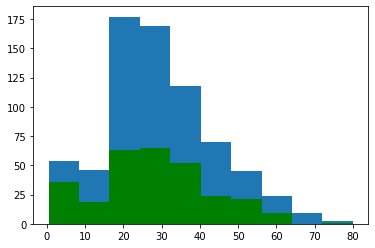

In [10]:
plt.hist(data.Age)
#plt.hist(data.query("Survived == 0"))
#plt.hist(data.query("Survived == 1"))
surv = data.query('Survived == 1')
deceased = data.query('Survived == 0')
plt.hist(surv.Age, color='green')
print(surv.Age.mean())
print(deceased.Age.mean())

< your thoughts >

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

In [11]:
#Embarked параметры:

In [12]:
#Зависимость "класс - выживаемость" показал выше (см. пункт EDA).
#Посмотрим на зависимость выживаемости пассажира от параметра Embarked 
#Также есть 2 пассажира с Embark == NaN, которые выжили, есть подозрение, что можем неправильно обучить модель (2 NaN == 2 Survived)
embarked_S_passangers = len(data.query("Embarked == 'S'"))
survived_embarked_S_passangers = len(data[(data.Embarked == 'S') & (data.Survived == 1)])

embarked_C_passangers = len(data.query("Embarked == 'C'"))
survived_embarked_C_passangers = len(data[(data.Embarked == 'C') & (data.Survived == 1)])

embarked_Q_passangers = len(data.query("Embarked == 'Q'"))
survived_embarked_Q_passangers = len(data[(data.Embarked == 'Q') & (data.Survived == 1)])

print(f"Persentage of the survived of S-embark: {round((survived_embarked_S_passangers / embarked_S_passangers) * 100, 2)}%")
print(f"Persentage of the survived in C-embark: {round((survived_embarked_C_passangers / embarked_C_passangers) * 100, 2)}%")
print(f"Persentage of the survived in Q-embark: {round((survived_embarked_Q_passangers / embarked_Q_passangers) * 100, 2)}%")

Persentage of the survived of S-embark: 33.7%
Persentage of the survived in C-embark: 55.36%
Persentage of the survived in Q-embark: 38.96%


< your thoughts >

Пассажиры с параметром

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [13]:
round(data.isnull().mean() * 100, 2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Видим, что есть пропуски в 3-х признаках: возраст и номер каюты и место посадки на Titanic. Также заметно(ячейка ниже), при понижении класса пассажира (от 1 --> 3), растет количество пропусков значений. По номеру каюты есть вопросы, так как вероятно, для пассажиров 3 класса номера не указывались и было что-то наподобие свободного размещения на вакантных местах. Так как возраст напрямую влияет на способность выживать (быстрее бежать, дольше продержаться в холодной воде, способности конкурировать за места в шлюпках и пр.), заполнить пропущенные значения средним будет неправильным. Я их буду дропать. 
Как и Embarked(менее 1% пропущенных значений). 
Что касается номеров кают, я попробую реализовать следующее: первая буква в номере каюты - это, как я полагаю, номер палубы от A до G. Спасательные шлюпки находились на верхней палубе, то есть чем ближе буква класса к началу алфавита, тем больше шансов на выживание имел пассажир если пренебрегать другими факторами(недостаток мест в шлюпках и первоочередная посадка женщин и детей). Планирую использовать номера палуб, как категориальный признак добавив к нему еще признак "N" для пассажиров, у кого не указан номер каюты.

In [14]:
#for i in range(1,4):
    #print(f"Class {i}: \n{data[data.Pclass == i].isnull().mean()}")

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [112]:
def cabin_transformer(cabin):
    cabin = str(cabin)
    return cabin[0].upper()

In [113]:
features = ["Pclass", "Sex", 'Age', 'SibSp', "Parch", 'Fare', 'Cabin', "Embarked"]
data.Age = data.Age.fillna(data.Age.mean())
data = data.dropna(subset=['Age', 'Embarked'])
data.Cabin = data.Cabin.apply(cabin_transformer)
data.Fare = data.Fare.astype(int)
y = data['Survived']
X = pd.get_dummies(data[features])

In [123]:
features = ["Pclass", "Sex", 'Age', 'SibSp', "Parch", 'Fare','Cabin', "Embarked"]
data_test.Age = data_test.Age.fillna(data.Age.mean())
data_test.Cabin = data_test.Cabin.apply(cabin_transformer)
data_test.Fare = data_test.Fare.fillna(data_test.Fare.mean())
data_test.Fare = data_test.Fare.astype(int)
test_X = pd.get_dummies(data_test[features])
test_X['Cabin_T'] = 0

In [115]:
data_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,N,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,N,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9,N,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8,N,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12,N,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8,N,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7,N,S


In [126]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [127]:
#НА ДАННЫЙ МОМЕНТ ЛУЧШИЙ СКОР - 0.76794.
clf = LogisticRegression(penalty='l2')
clf.fit(X_train,y_train)
#prediction = clf.predict(X_test)

c:\users\andrei\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
clf.score(X_train,y_train)

0.8280922431865828

In [129]:
clf.score(X_test,y_test)

0.7617021276595745

In [125]:
pred = clf.predict(test_X)

In [83]:
result = data_test.assign(Survived=clf.predict(test_X))
result = result.drop(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
#result

In [84]:
result.to_csv("my_submit_3.csv")

In [71]:

#prediction = clf.predict(X_test)
#data_test["Survived"] = prediction
#answer = data_test.drop(columns=['Name','Pclass', 'Sex','Age','SibSp','Parch','Ticket','Ticket','Fare','Cabin','Embarked'])
#answer.to_csv('my_submit_1.csv')

In [232]:
new_data = pd.read_csv('my_submit_1.csv')

In [223]:
# СКОР - 0.62918 (ЕСЛИ ПРОСТО ВСЕМ ЖЕНЩИНАМ ПОСТАВИТЬ "1", А МУЖЧИНАМ "0", ЧТО-ТО ОКОЛО 0.67, ТО ЕСТЬ ХУЖЕ)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean', weights='distance')
knn.fit(X, y)

prediction_knn = knn.predict(X_test)
submit_2 = pd.read_csv('my_submit_1.csv')
submit_2.Survived = prediction_knn

In [229]:
submit_2.to_csv('my_submit_2.csv', index=False)

На Каггле KNN дал почти 0.63, регрессия -почти 0.79. Нужно еще проверить с кросс-валидацией, как будет время.

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

см. выше.
Тренировал модель с применением get_dummies. Переводил категориальные признаки. Если будет время - нужно сделать StandardScaler и подумать над данными (возможно, что-то выбросить).

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.79 \leq score < 0.81,$$
$$ f(score) = 1.0, \ \ 0.81 \leq score < 0.83,$$ 
$$ f(score) = 2.5, \ \ 0.83 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [13]:
## your code
# На каггле есть выбитый скор в 0.76794. Здесь, пытаясь улучшить все перед дедлайном - сломал :(
# Координаты для связи дискорд - AndreiK(andreikrupets)

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [239]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

ParserError: Error tokenizing data. C error: out of memory

In [ ]:
insurance_data.head()

Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [236]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

NameError: name 'insurance_data' is not defined

In [17]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [234]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [235]:
clf = pipeline.fit(X_train, y_train)

NameError: name 'pipeline' is not defined

We'll calculate the model accuracy:

In [233]:
accuracy_score(y_valid, clf.predict(X_valid))

NameError: name 'y_valid' is not defined

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

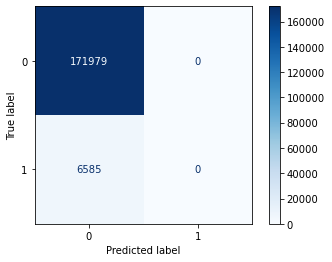

In [21]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [22]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

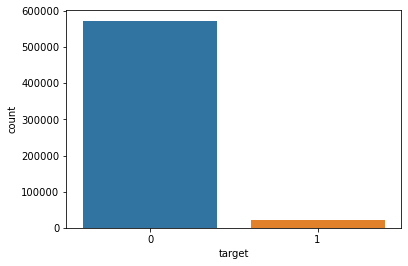

In [23]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [240]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

In [257]:
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
print(2* metrics.auc(y, pred))
print(gini_normalized(y, pred))


0.75
0.49999996249999745


**(0.5 points)** By the way, what other metrics could you suggest for this problem?

< your thoughts >

Let's calculate the Normalized Gini Coefficient:

In [102]:
y_pred = clf.predict_proba(X_valid)[:, 1]

NameError: name 'clf' is not defined

In [103]:
gini_normalized(y_valid, y_pred)

NameError: name 'y_valid' is not defined

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [27]:
## your code